In [1]:
%matplotlib inline
import cosima_cookbook as cc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, shiftgrid
import numpy as np
import netCDF4 as nc
import xarray as xr

In [2]:
from joblib import Memory

memory = Memory(cachedir='/g/data1/v45/cosima-cookbook/', verbose=0)

In [3]:
configuration = 'mom01v5'
#configuration = 'mom025'

expts = cc.get_experiments(configuration)
display(expts)

['GFDL50',
 'KDS75',
 'KDS75_PI',
 'KDS75_UP',
 'KDS75_WOA13',
 'KDS75_newbathy_CORE',
 'KDS75_newbathy_JRA',
 'KDS75_salt10days',
 'KDS75_saltfluxes',
 'KDS75_wind']

In [4]:
ncfile = 'ocean.nc'
#expt = 'mom025_jra_ryf9091'
expt = 'KDS75_newbathy_JRA' 

In [5]:
## Load zonal velocity from expt, pick up one year 
tmp = cc.get_nc_variable(expt, 'ocean.nc', 'u',n=9, time_units = 'days since 1900-01-01').isel(st_ocean=0)
u = tmp.sel(time=slice('1902-01','1902-12')).mean('time')
del(tmp)
## Load meridional velocity from expt, pick up one year 
tmp = cc.get_nc_variable(expt, 'ocean.nc', 'v',n=9, time_units = 'days since 1900-01-01').isel(st_ocean=0)
v = tmp.sel(time=slice('1902-01','1902-12')).mean('time')
del(tmp)

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=9), HTML(value='')))

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=9), HTML(value='')))

In [6]:
obs_file = xr.open_dataset('/g/data3/hh5/tmp/cosima/observations/original/drifter_annualmeans.nc').rename({'Lat':'latitude','Lon':'longitude'})
obs_u = obs_file['U']
obs_v = obs_file['V']

In [7]:
# calcuate the velocity speed 
vel = np.sqrt(u**2+v**2)
obs_vel = np.sqrt(obs_u**2+obs_v**2)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [12]:
u_kur = vel.sel(yu_ocean=slice(25,50)).sel(xu_ocean=slice(125.-360.,155.-360.)) # Kuroshio
obs_u_kur = obs_vel.sel(latitude=slice(25,50)).sel(longitude=slice(125.,155.)) # Kuroshio

u_gulf = vel.sel(yu_ocean=slice(25,50)).sel(xu_ocean=slice(-85.,-50.)) # Gulf stream
obs_u_gulf = obs_vel.sel(latitude=slice(25,50)).sel(longitude=slice(-85.,-50.)) # Gulf stream

u_east = vel.sel(yu_ocean=slice(-45,-20)).sel(xu_ocean=slice(145.-360.,175.-360.)) # East Australian Current
obs_u_east = obs_vel.sel(latitude=slice(-45,-20)).sel(longitude=slice(145.,175.)) # East Australian Current

u_agul = vel.sel(yu_ocean=slice(-45,-20)).sel(xu_ocean=slice(10.,40.)) # Agulhas Current
obs_u_agul = obs_vel.sel(latitude=slice(-45,-20)).sel(longitude=slice(10.,40.)) # Agulhas Current

Text(0.5,1,'Agulhas Current from Obs.')

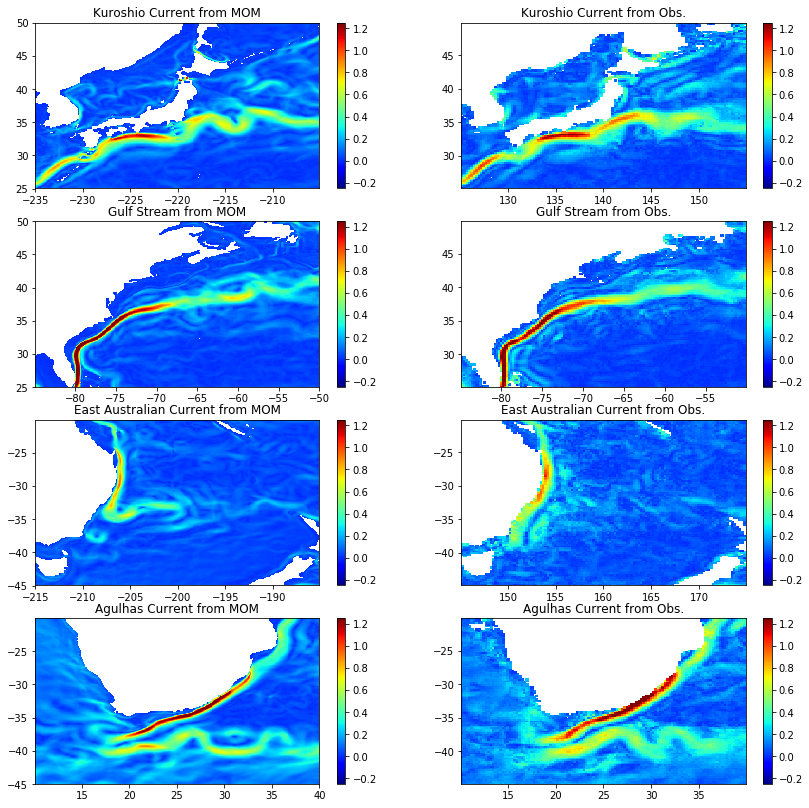

In [13]:
fig = plt.figure(figsize=(14,14))

ax = fig.add_subplot(4, 2, 1)
cax = ax.pcolormesh(u_kur.xu_ocean, u_kur.yu_ocean, u_kur, shading='flat', cmap=plt.cm.jet, vmin=-0.25, vmax=1.25)
fig.colorbar(cax)
plt.title('Kuroshio Current from MOM', fontsize=12)

ax = fig.add_subplot(4, 2, 2)
cax = ax.pcolormesh(obs_u_kur.longitude, obs_u_kur.latitude, np.swapaxes(obs_u_kur,0,1), shading='flat', cmap=plt.cm.jet, vmin=-0.25, vmax=1.25)
fig.colorbar(cax)
plt.title('Kuroshio Current from Obs.', fontsize=12)

ax = fig.add_subplot(4, 2, 3)
cax = ax.pcolormesh(u_gulf.xu_ocean, u_gulf.yu_ocean, u_gulf, shading='flat', cmap=plt.cm.jet, vmin=-0.25, vmax=1.25)
fig.colorbar(cax)
plt.title('Gulf Stream from MOM', fontsize=12)

ax = fig.add_subplot(4, 2, 4)
cax = ax.pcolormesh(obs_u_gulf.longitude, obs_u_gulf.latitude, np.swapaxes(obs_u_gulf,0,1), shading='flat', cmap=plt.cm.jet, vmin=-0.25, vmax=1.25)
fig.colorbar(cax)
plt.title('Gulf Stream from Obs.', fontsize=12)

ax = fig.add_subplot(4, 2, 5)
cax = ax.pcolormesh(u_east.xu_ocean, u_east.yu_ocean, u_east, shading='flat', cmap=plt.cm.jet, vmin=-0.25, vmax=1.25)
fig.colorbar(cax)
plt.title('East Australian Current from MOM', fontsize=12)

ax = fig.add_subplot(4, 2, 6)
cax = ax.pcolormesh(obs_u_east.longitude, obs_u_east.latitude, np.swapaxes(obs_u_east,0,1), shading='flat', cmap=plt.cm.jet, vmin=-0.25, vmax=1.25)
fig.colorbar(cax)
plt.title('East Australian Current from Obs.', fontsize=12)

ax = fig.add_subplot(4, 2, 7)
cax = ax.pcolormesh(u_agul.xu_ocean, u_agul.yu_ocean, u_agul, shading='flat', cmap=plt.cm.jet, vmin=-0.25, vmax=1.25)
fig.colorbar(cax)
plt.title('Agulhas Current from MOM', fontsize=12)

ax = fig.add_subplot(4, 2, 8)
cax = ax.pcolormesh(obs_u_agul.longitude, obs_u_agul.latitude, np.swapaxes(obs_u_agul,0,1), shading='flat', cmap=plt.cm.jet, vmin=-0.25, vmax=1.25)
fig.colorbar(cax)
plt.title('Agulhas Current from Obs.', fontsize=12)